______________________________________________________________________________________

# Intro


We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]. So we begin with what Géron says about life satisfactions vs GDP per capita.
 
Halfway down this notebook, a list of questions for SWMAL is presented.

# Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

## Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [ ]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

In [ ]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

# SWMAL

Now we plot the linear regression result.

Just ignore all the data plotter code mumbo-jumbo here (code take dirclty from the notebook, [GITHOML])...and see the final plot.

In [ ]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

# Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


## Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/supervised_learning.png" alt="WARNING: could not get image from server." style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}~$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

## Qa) The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model, via the models python attributes?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

What are the minimum and maximum values for $R^2~$?

Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness? 

NOTE$_1$: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

NOTE$_2$: there are different definitions of the $R^2$, 'coefficient of determination', in linear algebra. We stricly use the formulation above. 

OPTIONAL: Read the additional in-depth literature on $R^2~$:

> https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
# TODO: add your code here..
assert False, "TODO: solve Qa, and remove me.."

# The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


## Qb) Using k-Nearest Neighbors

Change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with k=3 (as in [HOML:p.22,bottom]), and rerun the `fit` and `predict` using this new model.

What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the k-nearest model use, and is it comparable to the linear regression model? 

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

Remember to put pointer/text from the Sckikit-learn documentation in the journal...(did you find the right kNN model etc.)

In [ ]:
# this is our raw data set:
sample_data

In [ ]:
# and this is our preprocessed data
country_stats

In [ ]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model

# TODO: add your code here..
assert False, "TODO: add you instatiation and training of the knn model here.."
# knn = ..

## Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# TODO: add your code here..
assert False, "TODO: try knn with different k_neighbor params, that is re-instantiate knn, refit and replot.."

## Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

In [ ]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
assert False, "TODO: predict value for Cyprus and fetch the score() from the fitting."

##  [OPTIONAL] Qe) Neural Network with pre-scaling

Now, the neurons in neural networks normally expects input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range the you put of the neuron will saturate to it's min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. To af fix to the problem in Qd) is to preprocess data by scaling it down to something more sensible.

Try to scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

In [ ]:
# TODO: add your code here..
assert False, "TODO: try prescale data for the MPL...any better?"

REVISIONS||
:- | :-
2018-12-18| CEF, initial.                  
2019-01-24| CEF, spell checked and update. 
2019-01-30| CEF, removed reset -f, did not work on all PC's. 
2019-08-20| CEF, E19 ITMAL update. 
2019-08-26| CEF, minor mod to NN exercise.
2019-08-28| CEF, fixed dataset dir issue, datapath"../datasets" changed to "./datasets".
2020-01-25| CEF, F20 ITMAL update.
2020-08-06| CEF, E20 ITMAL update, minor fix of ls to dir and added exception to datasets load, udpated figs paths.
2020-09-24| CEF, updated text to R2, Qa exe.
2020-09-28| CEF, updated R2 and theta extraction, use python attributes, moved revision table. Added comment about MLP.
2021-01-12| CEF, updated Qe.
2021-02-08| CEF, added ls for Mac/Linux to dir command cell. 
2021-08-02| CEF, update to E21 ITMAL.
2021-08-03| CEF, fixed ref to p21 => p.22.
2022-01-25| CEF, update to F22 SWMAL.
2022-08-30| CEF, update to v1 changes.
2023-08-30| CEF, minor table update for.

______________________________________________________________________________________

# Python Basics

## Modules and Packages in Python

Reuse of code in Jupyter notebooks can be done by either including a raw python source as a magic command

```python
%load filename.py
```
but this just pastes the source into the notebook and creates all kinds of pains regarding code maintenance.

A better way is to use a python __module__. A module consists simply (and pythonic) of a directory with a module init file in it (possibly empty) 
```python
libitmal/__init__.py
```
To this directory you can add modules in form of plain python files, say
```python
libitmal/utils.py
```
That's about it! The `libitmal` file tree should now look like
```
libitmal/
├── __init__.py
├── __pycache__
│   ├── __init__.cpython-36.pyc
│   └── utils.cpython-36.pyc
├── utils.py
```
with the cache part only being present once the module has been initialized.

You should now be able to use the `libitmal` unit via an import directive, like
```python
import numpy as np
from libitmal import utils as itmalutils

print(dir(itmalutils))
print(itmalutils.__file__)

X = np.array([[1,2],[3,-100]])
itmalutils.PrintMatrix(X,"mylabel=")
itmalutils.TestAll()
```

## Qa Load and test the `libitmal` module

Try out the `libitmal` module from [GITMAL]. Load this module and run the function

```python
from libitmal import utils as itmalutils
itmalutils.TestAll()
```
from this module.

### Implementation details

Note that there is a python module ___include___ search path, that you may have to investigate and modify. For my Linux setup I have an export or declare statement in my .bashrc file, like

```bash
declare -x PYTHONPATH=~/ASE/ML/itmal:$PYTHONPATH
```
but your ```itmal```, the [GITMAL] root dir, may be placed elsewhere.

For ___Windows___, you have to add `PYTHONPATH` to your user environment variables...see screenshot below (enlarge by modding the image width-tag or find the original png in the Figs directory).

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/Screenshot_windows_enviroment_variables.png" alt="WARNING: could not get image from server." style="height:250px" style="width:350px">

or if you, like me, hate setting up things in a GUI, and prefer a console, try in a CMD on windows

```bash
CMD> setx.exe PYTHONPATH "C:\Users\auXXYYZZ\itmal"
```

replacing the username and path with whatever you have. Note that some Windows installations have various security settings enables, so that running `setx.exe` fails. Setting up a MAC should be similar to Linux; just modify your `PYTHONPATH` setting (still to be proven correct?, CEF). 


If everything fails you could programmatically add your path to the libitmal directory as

```python
import sys,os
sys.path.append(os.path.expanduser('~/itmal'))

from libitmal import utils as itmalutils
print(dir(itmalutils))
print(itmalutils.__file__)
```

For the journal: remember to document your particular PATH setup.

In [5]:
# TODO: Qa...

## Qb Create your own module, with some functions, and test it

Now create your own module, with some dummy functionality. Load it and run you dummy function in a Jupyter Notebook.

Keep this module at hand, when coding, and try to capture reusable python functions in it as you invent them!

For the journal: remember to document your particular library setup (where did you place files, etc).

In [ ]:
# TODO: Qb...

## Qc How do you 'recompile' a module?

When changing the module code, Jupyter will keep running on the old module. How do you force the Jupyter notebook to re-load the module changes? 

NOTE: There is a surprising issue regarding module reloads in Jupyter notebooks. If you use another development framework, like Spyder or Visual Studio Code, module reloading works out-of-the-box. 

In [ ]:
# TODO: Qc...

## [OPTIONAL] Qd Write a Howto on Python Modules a Packages

Write a short description of how to use modules in Python (notes on modules path, import directives, directory structure, etc.)

In [ ]:
# TODO: Qd...

## Classes in Python

Good news: Python got classes. Bad news: they are somewhat obscure compared to C++ classes. 

Though we will not use object-oriented programming in Python intensively, we still need some basic understanding of Python classes. Let's just dig into a class-demo, here is `MyClass` in Python

```python
class MyClass:
   
    def myfun(self):
        self.myvar = "blah" # NOTE: a per class-instance variable.
        print(f"This is a message inside the class, myvar={self.myvar}.")

myobjectx = MyClass()
```

NOTE: The following exercise assumes some C++ knowledge, in particular the OPRG and OOP courses. If you are an EE-student, or from another Faculty, then ignore the cryptic C++ comments, and jump directly to some Python code instead. It's the Python solution here, that is important!

## Qe Extend the class with some public and private functions and member variables

How are private function and member variables represented in python classes? 

What is the meaning of `self` in python classes?

What happens to a function inside a class if you forget `self` in the parameter list, like `def myfun():` instead of `def myfun(self):` and you try to call it like `myobjectx.myfun()`? Remember to document the demo code and result.


[OPTIONAL] What does 'class' and 'instance variables' in python correspond to in C++? Maybe you can figure it out, I did not really get it reading, say this tutorial

> https://www.digitalocean.com/community/tutorials/understanding-class-and-instance-variables-in-python-3

In [ ]:
# TODO: Qe...

## Qf Extend the class with a Constructor

Figure a way to declare/define a constructor (CTOR) in a python class. How is it done in python?

Is there a class destructor in python (DTOR)? Give a textual reason why/why-not python has a DTOR?

Hint: python is garbage collection like in C#, and do not go into the details of `__del__, ___enter__, __exit__` functions...unless you find it irresistible to investigate.

In [ ]:
# TODO: Qf...

## Qg Extend the class with a to-string function

Then find a way to serialize a class, that is to make some `tostring()` functionality similar to a C++ 

```C++
friend ostream& operator<<(ostream& s,const MyClass& x)
{
    return os << ..
}
```

If you do not know C++, you might be aware of the C# way to string serialize
```
    string s=myobject.tostring()
```
that is a per-class buildin function `tostring()`, now what is the pythonic way of 'printing' a class instance?

In [ ]:
# TODO: Qg...

## [OPTIONAL] Qh Write a Howto on Python Classes 

Write a _How-To use Classes Pythonically_, including a description of public/privacy, constructors/destructors, the meaning of `self`, and inheritance.

In [ ]:
# TODO: Qh...

# Administration

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.                  
2018-02-06| CEF, updated and spell checked. 
2018-02-07| CEF, made Qh optional.
2018-02-08| CEF, added PYTHONPATH for windows.
2018-02-12| CEF, small mod in itmalutils/utils.
2019-08-20| CEF, E19 ITMAL update.
2020-01-25| CEF, F20 ITMAL update.
2020-08-06| CEF, E20 ITMAL update, udpated figs paths.
2020-09-07| CEF, added text on OPRG and OOP for EE's
2020-09-29| CEF, added elaboration for journal in Qa+b.
2021-02-06| CEF, fixed itmalutils.TestAll() in markdown cell.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2022-02-25| CEF, elaborated on setx.exe on Windows and MAC PYTHONPATH.
2022-08-30| CEF, updated to v1 changes.
2022-09-16| CEF, added comment on module reloading when not using notebooks.
2023-08-30| CEF, minor table and text update.

______________________________________________________________________________________

# Mathematical Foundation

## Vector and matrix representation in python

Say, we have $d$ features for a given sample point. This $d$-sized feature column vector for a data-sample $i$ is then given by

$$
    \newcommand\rem[1]{}
    \rem{SWMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\scriptsize #1}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
\bx\powni = 
    \ac{c}{
        x_1\powni \\
        x_2\powni \\ 
        \vdots \\
        x_d\powni
     }  
$$

or typically written transposed to save as

$$
    \bx\powni = \left[  x_1\powni~~ x_2\powni~~ \cdots~~ x_d\powni\right]^T
$$

such that $\bX$ can be constructed of the full set of $n$ samples of these feature vectors

$$
    \bX = 
      \ac{c}{
        (\bx\pown{1})^T \\
        (\bx\pown{2})^T \\
        \vdots \\
        (\bx\pownn)^T
      }
$$

or by explicitly writing out the full data matrix $\bX$ consisting of scalars 

$$
    \bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
            \vdots      &             &        & \vdots \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
        }
$$



but sometimes the notation is a little more fuzzy, leaving out the transpose operator for $\mathbf x$ and in doing so just interpreting the $\mathbf{x}^{(i)}$'s to be row vectors instead of column vectors.

The target column vector, $\mathbf y$, also has the dimension $n$ 

$$
    \by = \ac{c}{
            y\pown{1} \\
            y\pown{2} \\
            \vdots \\
            y\pownn \\
          }
$$

## Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$

### Implementation Details

Notice that the ```np.matrix``` class is getting deprecated! So, we use numpy's ```np.array``` as matrix container. Also, __do not__ use the built-in python lists or the numpy matrix subclass.

In [ ]:
# Qa

import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

# TODO..create and print the full matrix
assert False, "TODO: solve Qa, and remove me.."

## Norms, metrics or distances

The $\norm{2}$ Euclidian distance, or norm, for a vector of size $n$ is defined as 

$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$

and the distance between two vectors is given by

$$
    \ar{ll}{      
          \mbox{d}(\bx,\by) &= ||\bx-\by||_2\\
                     &= \left( \sum_{i=1}^n \left| x_{i}-y_{i} \right|^2 \right)^{1/2}
    }
$$ 

This Euclidian norm is sometimes also just denoted as $||\bx||$, leaving out the 2 in the subscript.

The squared $\norm{2}$ for a vector can compactly be expressed via 

$$
    \norm{2}^2: ||\bx||_2^2 = \bx^\top\bx
$$


The $\norm{1}$ 'City-block' norm is given by

$$
    \norm{1}:~~ ||\bx||_1 = \sum_i |x_i|
$$

but $\norm{1}$ is not used as intensive as its more popular $\norm{2}$ cousin. 

Notice that $|x|$ in code means ```fabs(x)```.

## Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

First implementation must be a 'low-level'/explicit implementation---using primitive/build-in functions, like ```+```, ```*``` and power ```**``` only! The square-root function can be achieved via power like ```x**0.5```.

Do NOT use any methods from libraries, like ```math.sqrt```, ```math.abs```, ```numpy.linalg.inner```, ```numpy.dot()``` or similar. Yes, using such libraries is an efficient way of building python software, but in this exercise we want to explicitly map the mathematichal formulaes to python code.

Name your functions L1 and L2 respectively, they both take one vector as input argument.

But test your implementation against some built-in functions, say  ```numpy.linalg.norm```

When this works, and passes the tests below, optimize the $\norm{2}$, such that it uses np.numpy's dot operator instead of an explicit sum, call this function ```L2Dot```. This implementation, ```L2Dot```, must be pythonic, i.e. it must not contain explicit for- or while-loops.

In [ ]:
# TODO: solve Qb...implement the L1, L2 and L2Dot functions...
assert False, "TODO: solve Qb, and remove me.."

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
#d2dot=L2Dot(tx-ty)
#print("d2dot-expected_d2=",d2dot-expected_d2)
#assert fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
#print("OK(part-2)")

# The cost function, $J$

Now, most ML algorithm uses norms or metrics internally when doing minimizations. Details on this will come later, but for now we need to know that an algorithm typically tries to minimize a given performance metric, the loss function, for all the input data, and implicitly tries to minimize the sum of all norms for the 'distances' between some predicted output, $y\st{pred}$ and the true output $y\st{true}$, with the distance between these typically given by the $\norm{2}$ norm

$$   
  \mbox{individual loss:}~~L\powni = \mbox{d}(y\st{pred}\powni,y\st{true}\powni)
$$ 

with $y\st{pred}\powni$, a scalar value, being the output from the hypothesis function, that maps the input vector $\bx\powni$ to a scalar

$$ 
    y_{pred}\powni = \hat{y}\powni = h(\bx\powni;\btheta)
$$

and the total loss, $J$ will be the sum over all $i$'s

$$
    \ar{rl}{
        J &= \frac{1}{n} \sum_{i=1}^{n} L\powni\\
        &= \frac{1}{n} \sum_{i=1}^{n} \mbox{d}( h(\bx\powni) , y\powni\st{true})
    }
$$


## Cost function in vector/matrix notation using $\norm{2}$

Remember the data-flow model for supervised learning

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/ml_simple_vector.png" alt="WARNING: could not get image from server." style="width:500px">

Let us now express $J$ in terms of vectors and matrices instead of summing over individual scalars, and let's use $\norm{2}$ as the distance function

$$
    \ar{rl}{
        J(\bX,\by;\btheta) &= \frac{1}{n} \sum_{i=1}^{n} L\powni\\
        &= \frac{1}{n}\sum_{i=1}^{n} (h(\bx\powni) - \by\powni\st{true})^2\\
        &= \frac{1}{n} ||h(\bX) - \by\st{true} ||_2^2\\
        &= \frac{1}{n} ||\by\st{pred} - \by\st{true} ||_2^2\\
     }
$$

with the matrix-vector notation

$$ 
    \by_{pred} = \hat{\by} =  h(\bX;\btheta)
$$

## Loss or Objective Function using the Mean Squared Error

This formulation is equal to the definition of the _mean-squared-error_, MSE (or indirectly also RMSE), here given in the general formulation for some random variable $Z$ 

$$
    \ar{rl}{
        \mbox{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2 = \frac{1}{n} SS\\
        \mbox{RMSE} &= \sqrt{\mbox{MSE}}\
    }
$$

with sum-of-squares (SS) is given simply by

$$
    \mbox{SS} = \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2\\
$$


So, using the $\norm{2}$ for the distance metric, is equal to saying that we want to minimize $J$ with respect to the MSE

$$
    \ar{rl}{
        J &= \mbox{MSE}(h(\bX), \by\st{true}) \\
          &= \mbox{MSE}(\by\st{pred}~, \by\st{true}) \\
          &= \mbox{MSE}(\hat{\by}, \by\st{true})
     }
$$

Note: when minimizing one can ignore the constant factor $1/n$ and it really does not matter if you minimize MSE or RMSE. Often $J$ is also multiplied by 1/2 to ease notation when trying to differentiate it.

$$
    \ar{rl}{
        J(\bX,\by\st{true};\btheta) &\propto \half ||\by\st{pred} - \by\st{true} ||_2^2 \\
          &\propto \mbox{MSE}
     }
$$

## MSE

Now, let us take a look on how you calculate the MSE.

The MSE uses the $\norm{2}$ norm internally, well, actually $||\cdot||^2_2$ to be precise, and basically just sums, means and roots the individual (scalar) losses (distances), we just saw before. 

And the RMSE is just an MSE with a final square-root call.

## Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

Call the function RMSE, and evaluate it using the $\bX$ matrix and $\by$ from Qa.

We implement a dummy hypothesis function, that just takes the first column of $\bX$ as its 'prediction'

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

Do not re-implement the $\norm{2}$ for the RMSE function, but call the '''L2''' function you just implemented internally in RMSE.

In [ ]:
# TODO: solve Qc...implement your RMSE function here
assert False, "TODO: solve Qc, and remove me.."


# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

## MAE

## Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

The MAE will algorithmic wise be similar to the MSE part from using the $\norm{1}$ instead of the $\norm{2}$ norm.

Again, re-implementation of the$\norm{1}$ is a no-go, call the '''L1''' instead internally i MAE.

In [ ]:
# TODO: solve Qd
assert False, "TODO: solve Qd, and remove me.."


# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

# Pythonic Code

## Robustness of Code

Data validity checking is an essential part of robust code, and in Python the 'fail-fast' method is used extensively: instead of lingering on trying to get the 'best' out of an erroneous situation, the fail-fast pragma will be very loud about any data inconsistencies at the earliest possible moment.

Hence robust code should include a lot of error checking, say as pre- and post-conditions (part of the design-by-contract programming) when calling a function: when entering the function you check that all parameters are ok (pre-condition), and when leaving you check the return parameter (post-conditions).  

Normally assert-checking or exception-throwing will do the trick just fine, with the exception method being more _pythonic_.

For the norm-function you could, for instance, test your input data to be 'vector' like, i.e. like

```python
    assert x.shape[0]>=0 and x.shape[1]==0
    
    if not x.ndim==1:
        raise some error
```
or similar.

## Qe Robust Code 

Add error checking code (asserts or exceptions), that checks for right $\hat\by$-$\by$ sizes of the MSE and MAE functions.

Also add error checking to all you previously tested L2() and L1() functions, and re-run all your tests.

In [ ]:
# TODO: solve Qe...you need to modify your python cells above
assert False, "TODO: solve Qe, and remove me.."

## Qf Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# TODO: Qf concluding remarks in text.. 

REVISIONS||
---------||
2018-12-18| CEF, initial.                  
2019-01-31| CEF, spell checked and update. 
2019-02-04| CEF, changed d1/d2 in Qb to L1/L2. Fixe rev date error.
2019-02-04| CEF, changed headline.
2019-02-04| CEF, changed (.) in dist(x,y) to use pipes instead.
2019-02-04| CEF, updated supervised learning fig, and changed , to ; for thetas, and change = to propto.
2019-02-05| CEF, post lesson update, minor changes, added fabs around two test vectors.
2019-02-07| CEF, updated def section. 
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2019-09-05| CEF, fixed defect in print string and commented on fabs.
2020-01-30| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-24| CEF, elaborated on MAE and RMSE, emphasized not to use np functionality in L1 and L2.
2020-09-03| CEF, E20 ITMAL update, updated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2021-01-12| CEF, F21 ITMAL update, moved revision table.
2021-02-09| CEF, elaborated on test-vectors. Changed order of Design Matrix descriptions.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2022-02-25| CEF, removed inner product equations.
2022-08-30| CEF, updated to v1 changes.
2023-02-07| CEF, minor update for d.

______________________________________________________________________________________

# Implementing a dummy binary-classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

## Qa  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert to [0;1] via scaling (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can reuse it later.

In [ ]:
# TODO: add your code here..
assert False, "TODO: solve Qa, and remove me.."

## Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.103.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader. In effect, we have now created a binary-classifier, that enable us to classify a particular data sample, $\mathbf{x}(i)$ (that is a 28x28 image), as being a-class-5 or not-a-class-5. 

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [ ]:
# TODO: add your code here..
assert False, "TODO: solve Qb, and remove me.."

## Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found in [HOML], p.107 (for [HOML] 1st and 2nd editions: name you estimator `DummyClassifier` instead of `Never5Classifyer`).

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/class_base_estimator.png" alt="WARNING: could not get image from server." style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.107. Are they comparable? 

In [ ]:
# TODO: add your code here..
assert False, "TODO: solve Qc, and remove me.."

## Qd Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# TODO: Qd concluding remarks in text..

REVISIONS||
---------||
2018-12-19| CEF, initial.                  
2018-02-06| CEF, updated and spell checked. 
2018-02-08| CEF, minor text update.
2018-03-05| CEF, updated with SHN comments.
2019-09-02| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-18| CEF, added binary-classifier text to Qb to emphasise 5/non-5 classification.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-07| CEF, update HOML page numbers.


______________________________________________________________________________________


# Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


## Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

## Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

## Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

## Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

## Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

## F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


# Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

## Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

## Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [ ]:
# TODO: Qa...

def MyAccuracy(y_true, y_pred):
    # TODO: you impl here
    assert False, "TODO: solve Qa, and remove me.."

    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
#def TestAccuracy(y_true, y_pred):
#    a0=MyAccuracy(y_true, y_pred)
#    a1=accuracy_score(y_true, y_pred)
#
#    print(f"\nmy a          ={a0}")
#    print(f"scikit-learn a={a1}")
#
#    # do some numerical comparison here, like
#    #  if fabs(a0-a1)<eps then ..

## Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [ ]:
# TODO: Qb..

def MyPrecision(y_true, y_pred):
    # TODO: you impl here
    assert False, "TODO: solve Qb, and remove me.."

def MyRecall(y_true, y_pred):
    # TODO: you impl here
    assert False, "TODO: solve Qb, and remove me.."
    
def MyF1Score(y_true, y_pred):
    # TODO: you impl here
    assert False, "TODO: solve Qb, and remove me.."

# TODO: your test code here!

## Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [ ]:
# TODO: Qc
assert False, "TODO: solve Qc, and remove me..

## Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

In [ ]:
# TODO: Qd
assert False, "TODO: solve Qd, and remove me..

## Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# TODO: Qe concluding remarks in text..

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-07| CEF, updated.
2018-02-07| CEF, rewritten accuracy paradox section.
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 STMAL.
2023-02-07| CEF, update HOML page numbers.
2023-02-09| CEF, chagned y_train to y_test in conf. matrix call.
2023-08-30| CEF, minor table change.

______________________________________________________________________________________


# Supergruppe diskussion


# § 2 "End-to-End Machine Learning Project" [HOML]

Genlæs kapitel  § 2 og forbered mundtlig præsentation.

# Forberedelse inden lektionen

Een eller flere af gruppe medlemmer forbereder et mundtligt resume af § 2:

* i skal kunne give et kort mundligt resume af hele § 2 til en anden gruppe (på nær, som nævnt, Create the Workspace og Download the Data),

* resume holdes til koncept-plan, dvs. prøv at genfortælle, hvad de overordnede linier er i kapitlerne i [HOML].

Lav et kort skriftlig resume af de enkelte underafsnit, ca. 5 til 20 liners tekst, se "TODO"-template herunder (MUST, til O2 aflevering).

Kapitler (incl. underkapitler):

* _Look at the Big Picture,_
* _Get the Data,_
* _Explore and Visualize the Data to Gain Insights,_ 
* _Prepare the Data for Machine Learning Algorithms,_
* _Select and Train a Model,_
* _Fine-Tune Your Model,_
* _Launch, Monitor, and Maintain Your System,_
* _Try It Out!._

# På klassen

Supergruppe [SG] resume af § 2 End-to-End, ca. 30 til 45 min.

* en supergruppe [SG], sammensættes af to grupper [G], on-the-fly på klassen,

* hver gruppe [G] forbereder og giver en anden gruppe [G] et mundtligt resume af § 2 til en anden gruppe,

* tid: ca. 30 mim. sammenlagt, den ene grupper genfortæller første halvdel af § 2 i ca. 15 min., hvorefter den anden gruppe genfortæller resten i ca. 15 min.

## Resume: Look at the Big Picture

TODO resume..

## Resume: Get the Data

TODO resume..

## Resume: Explore and Visualize the Data to Gain Insights,

TODO resume..

## Resume: Prepare the Data for Machine Learning Algorithms

TODO resume..

## Resume: Select and Train a Model

TODO resume..

## Resume: Fine-Tune Your Model

TODO resume..

## Resume: Launch, Monitor, and Maintain Your System

TODO resume..

## Resume: Try It Out!.

TODO resume..

REVISIONS||
---------||
2019-01-28| CEF, initial.
2020-02-05| CEF, F20 ITMAL update.
2021-08-17| CEF, E21 ITMAL update.
2021-09-17| CEF, corrected some spell errors.
2022-01-28| CEF, update to F22 SWMAL.
2022-09-09| CEF, corrected 'MUST for O1' to 'MUST for O2' in text.
2023-02-13| CEF, updated to HOML 3rd, removed exclude subsections in 'Get the Data' in this excercise, since the parts with python environments has been removed in HOML.

#  SWMAL Opgave

# Dataanalyse

## Qa) Beskrivelse af datasæt til O4 projekt

I kurset er slutprojektet et bærende element, som I forventes at arbejde på igennem hele kurset
sideløbende med de forskellige undervisningsemner. 

I skal selv vælge et O4 projekt–det anbefales at I vælger en problemstilling, hvor der allerede er data til rådighed og en god beskrivelse af data, dataopsamlingsmetode og problemstilling.

I denne opgave skal I:

* a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt. 

* b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.

* c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.

* d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget
bestemt, lave en regression eller klassifikation, el.lign. 

I vil nok komme til at anvende data også på andre måder i løbet af undervisningen – men det behøver I ikke nævne. Og det er også ok, hvis I ender med at bruge data på en anden måde end planlagt her.

Omfang af beskrivelsen forventes at være 1-2 sider.


## Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 


## NOTE vdr. billeddatasæts

For billeddata fer hver pixel en feature, og alm. analyse beskrevet ovenfor giver ikke indsigt. Prøv i stedet for billeder at beskrive billedformater (JPEG, PNG osv. / RGB, HSV, gråtone, multispektral, etc.), størrelser af billeder, hvordan de er repræsenteret på disk (dirs osv.)

Giv også eksempler på billeder og evt. labels i billedesæt.

Histogrammer kan udføres på enkelte billeder, men kun i forbindelse med labelede områder---og bedst på billesæt med ens baggrunde.

Benytter i lyddata eller video gælder de samme begrænsinger som får billeder her.

## NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

REVISIONS||
:-|:-|
2021-08-17| CEF, moved from Word to Notebook.
2021-11-08| CEF, elaborated on image based data.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-19| CEF, updated to F23 SWMAL.

______________________________________________________________________________________

# Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `itmal_l01_data.pkl', try reloading it..

In [ ]:
%matplotlib inline

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

##  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

In [ ]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

## Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

In [ ]:
# TODO: add your code here..
assert False, "TODO: rescale X and refit the model(s).."

## Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)

In [ ]:
# TODO: add your code here..
assert False, "TODO: put everything into a pipeline.."

## Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

In [ ]:
# TODO: research the problem here..
assert False, "TODO: investigate outlier problems and try a StandardScaler.."

## Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (p.333-334 [HOML,2nd], p.358-359 [HOML,3rd]) and the ELU activation function (p.336 [HOML,2nd], p.363 [HOML,3rd).

[OPTIONAL 1]: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

[OPTIONAL 2]: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

[OPTIONAL 3]: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

In [ ]:
# TODO: add your code here..
assert False, "TODO: test out various hyperparameters for the MLP.."

REVISIONS||
:-|:-|
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02-10| CEF, updated for SWMAL F22.
2023-02-19| CEF, updated for SWMAL F23, adjuste page numbers for 3rd.ed.
2023-02-21| CEF, added types, rewrote CalcPredAndScore and added isNumpyData.

______________________________________________________________________________________


# Training a Linear Regressor I 

The goal of the linear regression is to find the argument $w$ that minimizes the sum-of-squares error over all inputs. 

Given the usual ML input data matrix $\mathbf X$ of size $(n,d)$ where each row is an input column vector $(\mathbf{x}^{(i)})^\top$ data sample of size $d$

$$
    \renewcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \renewcommand\eq[2]{#1 &=& #2\\}
    \renewcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \renewcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \renewcommand\st[1]{_{\textrm{\scriptsize #1}}}
    \renewcommand\norm[1]{{\cal L}_{#1}}
    \renewcommand\obs[2]{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \renewcommand\diff[1]{\mathrm{d}#1}
    \renewcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \renewcommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \renewcommand\dfrac[2]{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
\bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
            \vdots      &             &        & \vdots \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
        }
$$

and $\by$ is the target output column vector of size $n$

$$
\by =
  \ac{c}{
     y\pown{1} \\
     y\pown{2} \\
     \vdots \\
     y\pown{n} \\
  }
$$

The linear regression model, via its hypothesis function and for a column vector input $\bx\powni$ of size $d$ and a column weight vector $\bw$ of size $d+1$ (with the additional element $w_0$ being the bias), can now be written as simple as

$$
\ar{rl}{
  h(\bx\powni;\bw) &= \bw^\top \ac{c}{1\\\bx\powni} \\
                   &= w_0 + w_1 x_1\powni + w_2 x_2\powni + \cdots + w_d x_d\powni
}
$$

using the model parameters or weights, $\bw$, aka $\btheta$. To ease notation $\bx$ is assumed to have the 1 element prepended in the following so that $\bx$ is a $d+1$ column vector

$$
\ar{rl}{
  \ac{c}{1\\\bx\powni} &\mapsto \bx\powni, ~~~~\textrm{by convention in the following...}\\
  h(\bx\powni;\bw) &= \bw^\top \bx\powni 
}
$$

This is actually the first fully white-box machine learning algorithm, that we see. All the glory details of the algorithm are clearly visible in the internal vector multiplication...quite simple, right? Now we just need to train the weights...
 
## Loss or Objective Function - Formulation for Linear Regression

The individual cost (or loss), $L\powni$, for a single input-vector $\bx\powni$ is a measure of how the model is able to fit the data: the higher the $L\powni$ value the worse it is able to fit. A loss of $L=0$ means a perfect fit.

It can be given by, say, the square difference from the calculated output, $h$, to the desired output, $y$

$$
\ar{rl}{
  L\powni &= || h(\bx\powni;\bw)      - y\powni ||_2^2\\
          &= || \bw^\top\bx\powni     - y\powni ||_2^2\\
          &= \left( \bw^\top\bx\powni - y\powni \right)^2 
}
$$
when $L$ is based on the $\norm{2}^2$ norm, and only when $y$ is in one dimension.

To minimize all the $L\powni$ losses (or indirectly also the MSE or RMSE) is to minimize the sum of all the
individual costs, via the total cost function $J$

$$
\ar{rl}{
\textrm{MSE}(\bX,\by;\bw) &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                    &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni \right)^2\\
                    &= \frac{1}{n} ||\bX \bw - \by||_2^2
}
$$                   

here using the squared Euclidean norm, $\norm{2}^2$, via the $||\cdot||_2^2$ expressions.

Now the factor $\frac{1}{n}$ is just a constant and can be ignored, yielding the total cost function

$$
\ar{rl}{
    J &= \frac{1}{2} ||\bX \bw - \by||_2^2\\
     &\propto \textrm{MSE}
}
$$

adding yet another constant, 1/2, to ease later differentiation of $J$.

## Training

Training the linear regression model now amounts to computing the optimal value of the $\bw$ weight; that is finding the $\bw$-value that minimizes the total cost

$$
 \bw^* = \textrm{argmin}_\bw~J\\
$$

where $\textrm{argmin}_\bw$ means find the argument of $\bw$ that minimizes the $J$ function. This minimum (sometimes a maximum, via argmax) is denoted $\bw^*$ in most ML literature. 

The minimization can in 2-D visually be drawn as finding the lowest $J$ that for linear regression always form a convex shape 

<img src="https://itundervisning.ase.au.dk/SWMAL/L05/Figs/minimization.png" alt="WARNING: could not get image from server." style="height:240px">

## Training: The Closed-form Solution

To solve for $\bw^*$ in closed form (i.e. directly, without any numerical approximation), we find the gradient of $J$ with respect to $\bw$. Taking the partial deriverty $\partial/\partial_\bw$ of the $J$ via the gradient (nabla) operator

$$
\rem{
 \frac{\partial}{\partial \bw} = 
   \ac{c}{
     \frac{\partial}{\partial w_1} \\
     \frac{\partial}{\partial w_2} \\
     \vdots\\
     \frac{\partial}{\partial w_d}
   }
}    
 \nabla_\bw~J = 
   \left[ \frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2}, \ldots ,  \frac{\partial J}{\partial w_m}   \right]^\top
$$
     
and setting it to zero yields the optimal solution for $\bw$, and ignoring all constant factors of 1/2
and $1/n$

$$
\ar{rl}{
  \nabla_\bw J(\bw) &= \bX^\top \left( \bX \bw - \by \right) ~=~ 0\\
                  0 &= \bX^\top\bX \bw - \bX^\top\by
}
$$

giving the closed-form solution, with $\by = [y\pown{1}, y\pown{2}, \cdots,
y\pown{n}]^\top$

$$
\bw^* ~=~ \left( \bX^\top \bX \right)^{-1} \bX^\top \by
$$

You already know this method from math, finding the extrema for a function, say 

$$f(w)=w^2-2w-2$$ 

so is given by finding the place where the gradient $\mathrm{d}~f(w)/\mathrm{d}w = 0$

$$
   \dfrac{f(w)}{w} = 2w -2 = 0
$$

so we see that there is an extremum at $w=1$. Checking the second deriverty tells if we are seeing a minimum, maximum or a saddlepoint at that point. In matrix terms, this corresponds to finding the _Hessian_ matrix and gets notational tricky due to the multiple feature dimensions involved.


> https://en.wikipedia.org/wiki/Ordinary_least_squares

> https://en.wikipedia.org/wiki/Hessian_matrix

## Qa Write a Python function that uses the closed-form to find $\bw^*$

Use the test data, `X` and `y` in the code below to find `w` via the closed-form. Use the test vectors for `w` to test your implementation, and remember to add the bias term (concat an all-one vector to `X` before solving). 

In [ ]:
# TODO: Qa...

# TEST DATA: 
import numpy as np
from libitmal import utils as itmalutils

def GenerateData():
    X = np.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = np.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y

X, y = GenerateData()
assert False, "find the least-square solution for X and y, your implementation here, say from [HOML, p.114 2nd./p.134 3rd.]"

# w = ...


# TEST VECTOR:
w_expected = np.array([4.046879011698, 1.880121487278])
itmalutils.PrintMatrix(w, label="w=", precision=12)
itmalutils.AssertInRange(w, w_expected, eps=1E-9)

print("OK")

## Qb Find the limits of the least-square method

Again find the least-square optimal value for `w` now using then new `X` and `y` as inputs.

Describe the problem with the matrix inverse, and for what `M` and `N` combinations do you see, that calculation of the matrix inverse takes up long time?

In [ ]:
# TODO: Qb...
def GenerateData(M, N):
    # TEST DATA: Matrix, taken from [HOML]
    print(f'GenerateData(M={N}, N={N})...')
    
    assert M>0
    assert N>0
    assert isinstance(M, int)
    assert isinstance(N, int)

    # NOTE: not always possible to invert a random matrix; 
    #       it becomes sigular, hence a more elaborate choice 
    #       of values below (but still a hack): 
    X=2 * np.ones([M, N])
    for i in range(X.shape[0]):
        X[i,0]=i*4
    for j in range(X.shape[1]):
        X[0,j]=-j*4

    y=4 + 3*X + np.random.randn(M,1)
    y=y[:,0] # well, could do better here!
    
    return X, y

X, y = GenerateData(M=10000, N=20)
assert False, "find the least-square solution for X and y, again"

# w = 


print("OK")

REVISIONS||
:- | :- |
2018-12-18| CEF, initial.
2018-02-14| CEF, major update.
2018-02-18| CEF, fixed error in nabla expression.
2018-02-18| CEF, added minimization plot.
2018-02-18| CEF, added note on argmin/max.
2018-02-18| CEF, changed concave to convex.
2021-09-26| CEF, update for ITMAL E21.
2011-10-02| CEF, corrected page numbers for HOML v2 (109=>114).
2022-03-09| CEF, elaboreted on code and introduced GetData().
2023-02-22| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-09-19| CEF, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.
2023-09-28| CEF, elaborated on L-expressions from (..)^2 to \|\| .. \|\|_2^2.


______________________________________________________________________________________


# Gradient Descent Methods and Training

Finding the optimal solution in one-step, via 

$$
    \renewcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \renewcommand\eq[2]{#1 &=& #2\\}
    \renewcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \renewcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \renewcommand\st[1]{_{\textrm{\scriptsize #1}}}
    \renewcommand\norm[1]{{\cal L}_{#1}}
    \renewcommand\obs[2]{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \renewcommand\diff[1]{\mathrm{d}#1}
    \renewcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \renewcommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \renewcommand\dfrac[2]{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
\bw^* ~=~ \left( \bX^\top \bX \right)^{-1} \bX^\top \by
$$

has its downsides: the scaling problem of the matrix inverse. Now, let us look at a numerical solution to the problem of finding the value of $\bw$  (aka $\btheta$) that minimizes the objective function $J$.

Again, ideally we just want to find places, where the (multi-dimensionally) gradient of $J$ is zero (here using a constant factor $\frac{2}{m}$)

$$
\ar{rl}{
  \nabla_\bw J(\bw) &= \frac{2}{m} \bX^\top \left( \bX \bw - \by \right)\\
}
$$

and numerically we calculate $\nabla_{\bw} J$ for a point in $\bw$-space, and then move along in the opposite direction of this gradient, taking a step of size $\eta$

$$ 
  \bw^{(step~N+1)} = \bw^{(step~N)} - \eta \nabla_{\bw} J(\bw)
$$

That's it, pretty simple, right (apart from numerical stability, problem with convergence and regularization, that we will discuss later).

So, we begin with some initial $\bw$, and iterate via the equation above, towards places, where $J$ is smaller, and this can be illustrated as

<img src="https://itundervisning.ase.au.dk/SWMAL/L05/Figs/minimization_gd.png" alt="WARNING: could not get image from server." style="height:240px">


If we hit the/a global minimum or just a local minimum (or in extremely rare cases a local saddle point) is another question when not using a simple linear regression model: for non-linear models we will in general not see a nice convex $J$-$\bw$ surface, as in the figure above.

## Qa The Gradient Descent Method (GD)

Explain the gradient descent algorithm using the equations in the section _'§ Bach Gradient Descent'_ [HOML, p.121-122 2nd, p.143 3rd], and relate it to the code snippet 

```python
X_b, y = GenerateData()

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
``` 
in the python code below. 

As usual, avoid going top much into details of the code that does the plotting.

What role does `eta` play, and what happens if you increase/decrease it (explain the three plots)?

In [ ]:
# TODO: Qa...examine the method (without the plotting)

# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

#############################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

## Qb The Stochastic Gradient Descent Method (SGD)

Now, introducing the _stochastic_ variant of gradient descent, explain the stochastic nature of the SGD, and comment on the difference to the _normal_ gradient descent method (GD) we just saw.

Also explain the role of the calls to `np.random.randint()` in the code, 

HINT: In detail, the important differences are, that the main loop for SGC is 
```python
for epoch in range(n_epochs):
    for i in range(m):
        .
        .
        .
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = ...
        theta = ...
```
where it for the GD method was just
```python
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = ..
```

NOTE: the call `np.random.seed(42)` resets the random generator so that it produces the same random-sequence when re-running the code.

In [ ]:
# TODO: Qb...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

        plt.plot(X, y, "b.")      

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')

#############################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

## Qc Adaptive learning rate for $\eta$  

There is also an adaptive learning rate method in the demo code for the SGD. 

Explain the effects of the `learning_schedule()` functions.

You can set the learning rate parameter (also known as a hyperparameter) in may ML algorithms, say for SGD regression, to a method of your choice 

```python
SGDRegressor(max_iter=1,
             eta0=0.0005,
             learning_rate="constant", # or 'adaptive' etc.
             random_state=42)
```

but as usual, there is a bewildering array of possibilities...we will tackle this problem later when searching for the optimal hyperparameters.

NOTE: the `learning_schedule()` method could also have been used in the normal SG algorithm; is not directly part of the stochastic method, but a concept in itself.

In [ ]:
# TODO: Qc...in text

## Qd Mini-batch Gradient Descent Method 

Finally explain what a __mini-batch__ SG method is, and how it differs from the two others.

Again, take a peek into the demo code below, to extract the algorithm details...and explain the __main differences__, compared with the GD and SGD.

In [ ]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f'mini-batch theta={theta.ravel()}')
print('OK')

## Qe Choosing a Gradient Descent Method

Explain the $θ_0−θ_1$ plot below, and make a comment on when to use GD/SGD/mini-batch gradient descent (pros and cons for the different methods).

In [ ]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')

## [OPTIONAL]  Qf Extend the MyRegressor 

NOTE: this excercise only possible if `linear_regression_2.ipynb` has been solved.

Can you extend the `MyRegressor` class from the previous `linear_regression_2.ipynb` notebook, adding a numerical train method? Choose one of the gradient descent methods above...perhaps starting with a plain SG method.

You could add a parameter for the class, indicating it what mode it should be operating: analytical closed-form or numerical, like

```python  
class MyRegressor(BaseEstimator):
    def __init__(self, numerical = False):
        self.__w = None
        self.__numerical_mode = numerical
    .
    .
    .
```

In [ ]:
# TODO: Qf...[OPTIONAL]

REVISIONS||
:- | :- |
2018-02-14| CEF, initial.
2018-02-14| CEF, added optional exe.
2018-02-20| CEF, major update.
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, removed =0 in expression.
2018-02-25| CEF, minor text updates and made Qc optional.
2018-02-25| CEF, minor source code cleanups.
2021-09-18| CEF, update to ITMAL E21.
2021-10-02| CEF, corrected link to extra material and page numbers for HOML v2 (114/115=>121/122).
2022-01-25| CEF, update to SWMAL F22.
2023-02-22| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23
2023-09-19| CEF, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.


______________________________________________________________________________________


#  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

In [ ]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

## Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [ ]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

In [ ]:
# TODO: plot the fit..

## Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [ ]:
# TODO: extract and print all coefficients..

## Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [ ]:
# TODO: create formula..

## Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

In [ ]:
# TODO: plot the formula..

## Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

In [ ]:
# TODO: plot the first and second half of the formula..

## Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

In [ ]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

# TODO:
assert False, "TODO: instantiate and train an MLP on the sinc data.."

##  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [ ]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.

______________________________________________________________________________________


# Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

In [1]:
# TODO: CNN implemetation via Keras..

REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.

______________________________________________________________________________________

# Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


## Qa) On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In [ ]:
# TODO: ...in text
assert False, "TODO: write some text.."

## Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that is _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE$_1$: the generalization plot figure 5.3 in [DL] (above) and the plots below have different x-axis, and are not to be compared directly!

NOTE$_2$: notice that a 90 degree polynomial is used for the polynomial regression. This is just to produce a model with an extremly high capacity.

In [ ]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [ ]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

In [ ]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: code review..
assert False, "TODO: code review in text form"

## Qc)  Early Stopping

How would you implement ___early stopping___, in the code above? 

Write an explanation of the early stopping concept...that is, just write some pseudo code that 'implements' the early stopping. 

OPTIONAL: also implement your early stopping pseudo code in Python, and get it to work with the code above (and not just flipping the hyperparameter to `early_stopping=True` on the `SGDRegressor`).

In [ ]:
# TODO: early stopping..
assert False, "TODO: explain early stopping"

## Qd) Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below (code similar to what we saw in `capacity_under_overfitting.ipynb`), and explain the generated RMSE-Capacity plot. Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.

In [ ]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: investigate..
assert False, "TODO: ...answer in text form"

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added comment on 90 degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.


______________________________________________________________________________________


# Model capacity and under/overfitting

NOTE: text and code to the exercise taken from

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
 
This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. 

The plot below shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. 

We can see that a linear function (polynomial with degree 1) is not sufficient to fit the
training samples.  This is called **underfitting**. 

A polynomial of degree four approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the
training data.

We evaluate quantitatively **overfitting**/**underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

## Qa) Explain the polynomial fitting via code review

Review the code below, write a __short__ code review summary, and explain how the polynomial fitting is implemented?

NOTE: Do not dig into the plotting details (its unimportant compared to the rest of the code), but just explain the outcome of the plots.

In [ ]:
# TODO: code review 
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

In [ ]:
# TODO: code review..
assert False, "TODO: review in text"

## Qb) Explain the capacity and under/overfitting concept

Write a textual description of the capacity and under/overfitting concept using the plots in the code above.

What happens when the polynomial degree is low/medium/high with respect to under/overfitting  concepts? Explain in details.

In [ ]:
# TODO: plot explainations..
assert False, "TODO: answer...in text"

## Qc) Score method

Why is the scoring method called `neg_mean_squared_error` in the code? 

Explain why we see a well known $J$-function, the $MSE$, is conceptually moving from being a cost-function to now be a score function, how can that be?

What happens if you try to set it to `mean_squared_error`, i.e. does it work or does it raise an exception, ala

```python
scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
```

Remember to document the outcome for Your journal.

What is the theoretical minimum and maximum score values (remember that the score range was $[-\infty;1]$ for the $r^2$ score). Why does the Degree 15 model have a `Score(-MSE) = -1.8E8`? And, why is this by no means the best model?

More on Score funs at

* https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# TODO: examine the score method..
assert False, "TODO: explain and test the neg_mean_squared_error in the code above"

REVISIONS||
:-|:-
2018-12-18| CEF, initial.
2018-02-14| CEF, major update.
2018-02-20| CEF, added code reference.
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2021-10-29| CEF, changed sign of score(-MSE) for score=neg_mean_squared_error.
2021-10-04| CEF, update to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-15| CEF, minor update to SWMAL F23.

______________________________________________________________________________________


# Hyperparameters and Gridsearch 

When instantiating a Scikit-learn model in python most or all constructor parameters have _default_ values. These values are not part of the internal model and are hence called ___hyperparameters___---in contrast to _normal_ model parameters, for example the neuron weights, $\mathbf w$, for an `MLP` model.

## Manual Tuning Hyperparameters

Below is an example of the python constructor for the support-vector classifier `sklearn.svm.SVC`, with say the `kernel` hyperparameter having the default value `'rbf'`. If you should choose, what would you set it to other than `'rbf'`? 

```python
class sklearn.svm.SVC(
    C=1.0, 
    kernel=’rbf’, 
    degree=3,
    gamma=’auto_deprecated’, 
    coef0=0.0, 
    shrinking=True, 
    probability=False, 
    tol=0.001, 
    cache_size=200, 
    class_weight=None, 
    verbose=False, 
    max_iter=-1, 
    decision_function_shape=’ovr’, 
    random_state=None
  )
```  

The default values might be a sensible general starting point, but for your data, you might want to optimize the hyperparameters to yield a better result. 

To be able to set `kernel` to a sensible value you need to go into the documentation for the `SVC` and understand what the kernel parameter represents, and what values it can be set to, and you need to understand the consequences of setting `kernel` to something different than the default...and the story repeats for every other hyperparameter!

## Brute Force  Search

An alternative to this structured, but time-consuming approach, is just to __brute-force__ a search of interesting hyperparameters, and  choose the 'best' parameters according to a fit-predict and some score, say 'f1'. 

<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/gridsearch.png"  alt="WARNING: could not get image from server."  style="width:350px">
<small><em>
    <center> Conceptual graphical view of grid search for two distinct hyperparameters. </center> 
    <center> Notice that you would normally search hyperparameters like `alpha` with an exponential range, say [0.01, 0.1, 1, 10] or similar.</center>
</em></small>

Now, you just pick out some hyperparameters, that you figure are important, set them to a suitable range, say

```python
    'kernel':('linear', 'rbf'), 
    'C':[1, 10]
```
and fire up a full (grid) search on this hyperparameter set, that will try out all your specified combination of `kernel` and `C` for the model, and then prints the hyperparameter set with the highest score...

The demo code below sets up some of our well known 'hello-world' data and then run a _grid search_ on a particular model, here a _support-vector classifier_ (SVC)

Other models and datasets  ('mnist', 'iris', 'moon') can also be examined.

## Qa Explain GridSearchCV

There are two code cells below: 1) function setup, 2) the actual grid-search.

Review the code cells and write a __short__ summary. Mainly focus on __cell 2__, but dig into cell 1 if you find it interesting (notice the use of local-function, a nifty feature in python).
  
In detail, examine the lines:  
  
```python
grid_tuned = GridSearchCV(model, tuning_parameters, ..
grid_tuned.fit(X_train, y_train)
..
FullReport(grid_tuned , X_test, y_test, time_gridsearch)
```
and write a short description of how the `GridSeachCV` works: explain how the search parameter set is created and the overall search mechanism is functioning (without going into too much detail).

What role does the parameter `scoring='f1_micro'` play in the `GridSearchCV`, and what does `n_jobs=-1` mean? 

In [ ]:
# TODO: Qa, code review..cell 1) function setup

from time import time
import numpy as np
import sys

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model): 
    
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""          
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'  
            return ret_str          
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')' 
        except:
            return "N/A(1)"
        
    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")
    
    global currmode                
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"   
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_ 

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)                 
    print(classification_report(y_true, y_pred, target_names=target_names))
    print()
    
def FullReport(model, X_test, y_test, t):
    print(f"SEARCH TIME: {t:0.2f} sec")
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)    
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel
    
def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0
    
    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")
    
    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")
        
    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )
    
    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()
    
    return X_train, X_test, y_train, y_test

def TryKerasImport(verbose=True):
    
    kerasok = True
    try:
        import keras as keras_try
    except:
        kerasok = False

    tensorflowkerasok = True
    try:
        import tensorflow.keras as tensorflowkeras_try
    except:
        tensorflowkerasok = False
        
    ok = kerasok or tensorflowkerasok
    
    if not ok and verbose:
        if not kerasok:
            print("WARNING: importing 'keras' failed", file=sys.stderr)
        if not tensorflowkerasok:
            print("WARNING: importing 'tensorflow.keras' failed", file=sys.stderr)

    return ok
    
print(f"OK(function setup" + ("" if TryKerasImport() else ", hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!") + ")")

In [ ]:
# TODO: Qa, code review..cell 2) the actual grid-search

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = svm.SVC(
    gamma=0.001
)  # NOTE: gamma="scale" does not work in older Scikit-learn frameworks,
# FIX:  replace with model = svm.SVC(gamma=0.001)

tuning_parameters = {
    'kernel': ('linear', 'rbf'), 
    'C': [0.1, 1, 10]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

## Qb Hyperparameter Grid Search using an SDG classifier

Now, replace the `svm.SVC` model with an `SGDClassifier` and a suitable set of the hyperparameters for that model.

You need at least four or five different hyperparameters from the `SGDClassifier` in the search-space before it begins to take considerable compute time doing the full grid search.

So, repeat the search with the `SGDClassifier`, and be sure to add enough hyperparameters to the grid-search, such that the search takes a considerable time to run, that is a couple of minutes or up to some hours..

In [ ]:
# TODO: grid search
assert False, "TODO: make a grid search on the SDG classifier.."

## Qc Hyperparameter Random  Search using an SDG classifier

Now, add code to run a `RandomizedSearchCV` instead.

<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/randomsearch.png" alt="WARNING: could not get image from server."  style="width:350px" >
<small><em>
    <center> Conceptual graphical view of randomized search for two distinct hyperparameters. </center> 
</em></small>

Use these default parameters for the random search, similar to the default parameters for the grid search

```python
random_tuned = RandomizedSearchCV(
    model, 
    tuning_parameters, 
    n_iter=20, 
    random_state=42, 
    cv=CV, 
    scoring='f1_micro', 
    verbose=VERBOSE, 
    n_jobs=-1
)
```

but with the two new parameters, `n_iter` and `random_state` added. Since the search-type is now random, the `random_state` gives sense, but essential to random search is the new `n_tier` parameter.

So: investigate the `n_iter` parameter...in code and write a conceptual explanation  in text.

Comparison of time (seconds) to complete `GridSearch` versus `RandomizedSearchCV`, does not necessarily give any sense, if your grid search completes in a few seconds (as for the iris tiny-data). You need a search that runs for minutes, hours, or days.

But you could compare the best-tuned parameter set and best scoring for the two methods. Is the random search best model close to the grid search?  

In [ ]:
# TODO:
assert False, "implement a random search for the SGD classifier.."

# Qd MNIST Search Quest II

Finally, a search-quest competition: __who can find the best model+hyperparameters for the MNIST dataset?__

You change to the MNIST data by calling `LoadAndSetupData('mnist')`, and this is a completely other ball-game that the iris _tiny-data_: it's much larger (but still far from _big-data_)!

* You might opt for the exhaustive grid search, or use the faster but-less optimal random search...your choice. 

* You are free to pick any classifier in Scikit-learn, even algorithms we have not discussed yet---__except Neural Networks and KNeighborsClassifier!__. 

* Keep the score function at `f1_micro`, otherwise, we will be comparing 'æbler og pærer'. 

* And, you may also want to scale your input data for some models to perform better.

* __REMEMBER__, DO NOT USE any Neural Network models. This also means not to use any `Keras` or `Tensorflow` models...since they outperform most other models, and there are also too many examples on the internet to cut-and-paste from!

Check your result by printing the first _return_ value from `FullReport()` 
```python 
b1, m1 = FullReport(random_tuned , X_test, y_test, time_randomsearch)
print(b1)
```
that will display a result like
```
best: dat=mnist, score=0.90780, model=SGDClassifier(alpha=1.0,eta0=0.0001,learning_rate='invscaling')
```
and paste your currently best model into the message box, for ITMAL group 09 like
```
Grp09: best: dat=mnist, score=0.90780, model=SGDClassifier(alpha=1.0,eta0=0.0001,learning_rate='invscaling')

Grp09: CTOR for best model: SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
```
              
on Brightspace: "L09: Regularisering, optimering og søgning" | "Qd MNIST Search Quest"

> https://itundervisning.ase.au.dk/itmal_quest/index.php

and, check if your score (for MNIST) is better than the currently best score. Republish if you get a better score than your own previously best. Deadline for submission of scores is the same as the deadline for the O3 journal handin.

Remember to provide an ITMAL group name manually, so we can identify a winner: the 1. st price is  cake! 

For the journal hand-in, report your progress in scoring choosing different models, hyperparameters to search and how you might need to preprocess your data...and note, that the journal will not be accepted unless it contains information about Your results published on the Brightspace 'Search Quest II' page!

In [ ]:
# TODO:(in code and text..)
assert False, "participate in the Search Quest---remember to publish your result(s) on Brightspace."

REVISIONS||
:-|:-
2018-03-01| CEF, initial.
2018-03-05| CEF, updated.
2018-03-06| CEF, updated and spell checked.
2018-03-06| CEF, major overhaul of functions.
2018-03-06| CEF, fixed problem with MNIST load and Keras.
2018-03-07| CEF, modified report functions and changed Qc+d.
2018-03-11| CEF, updated Qd.
2018-03-12| CEF, added grid and random search figs and added bullets to Qd.
2018-03-13| CEF, fixed SVC and gamma issue, and changed dataload to be in fetchmode (non-keras).
2019-10-15| CEF, updated for ITMAL E19
2019-10-19| CEF, minor text update.
2019-10-23| CEF, changed demo model i Qd) from MLPClassifier to SVC.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-20| CEF, updated to ITMAL E20.
2020-10-27| CEF, type fixes and minor update.
2020-10-28| CEF, added extra journal hand-in specs for Search Quest II, Qd.
2020-10-30| CEF, added non-use of KNeighborsClassifier to Search Quest II, Qd.
2020-11-19| CEF, changed load_mode=2 (Keras) to load_mode=0 (auto) for MNIST loader.
2021-03-17| CEF, updated to ITMAL F21.
2021-10-31| CEF, updated to ITMAL E21.
2021-11-05| CEF, removed iid=True paramter from GridSearchCV(), not present in current version of Scikit-learn (0.24.1).
2022-03-31| CEF, updated to SWMAL F22.
2022-08-30| CEF, updating to v1 changes.
2022-11-04| CEF, updated link to Brightspace, Search Quest II.
2022-11-04| CEF, fixed error "TypeError: classification_report() takes 2 position..".
2022-11-11| CEF, elaborated on Search Quest II deadline.
2023-03-24| CEF, updated link and updated to SWMAL F23.

______________________________________________________________________________________

# Regulizers

## Resume of The Linear Regressor

For our  data set $\mathbf{X}$ and target $\mathbf{y}$ 

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\scriptsize\textrm{test}}}
    \def\powtrain{\pown{\scriptsize\textrm{train}}}
    \def\pred{\st{pred}}
    \def\bM{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bm{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
\bX =
    \ac{cccc}{
        x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
        x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
        \vdots      &             &        & \vdots \\
        x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
    }
, ~~~~~~~~
\by =
    \ac{c}{
         y\pown{1} \\
         y\pown{2} \\
         \vdots \\
         y\pown{n} \\
    }
%, ~~~~~~~~
%\bx\powni = 
%    \ac{c}{
%        1\\
%        x_1\powni \\
%        x_2\powni \\ 
%        \vdots \\
%        x_d\powni
%     }  
$$

a __linear regressor__ model, with the $d$-dimensional (expressed here without the bias term, $w_0$) weight column vector,

$$
\bw =
    \ac{c}{
         w_1 \\
         w_2 \\
         \vdots \\
         w_d \\
    }
$$


was previously found to be of the form

$$
    y\powni\pred =  \bw^\top \bx\powni
$$

for a single data instance, or for the full data set in a compact matrix notation 

$$
    \by\pred = \bX \bw
$$

(and rememering to add the bias term $w_0$ on $\bw$ and correspondingly adding fixed '1'-column in the $\bX$ matrix, later.) 

An accociated cost function could be the MSE 

$$
\ar{rl}{
    \textrm{MSE}(\bX,\by;\bw) &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                            &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni\pred \right)^2\\
                            &\propto ||\bX \bw - \by\pred||_2^2
}
$$                   

here using the squared Euclidean norm, $\norm{2}^2$, via the $||\cdot||_2^2$ expressions. We used the MSE to express the total cost function, $J$, as

$$
   \textrm{MSE} \propto J = ||\bX \bw - \by\pred||_2^2
$$

give or take a few constants, like $1/2$ or $1/n$.

## Adding Regularization to the Linear Regressor

Now the weights, $\bw$ (previously also known as $\btheta$), in this model are free to take on any value they like, and this can  lead to both numerical problems and overfitting, if the algorithm decides to drive the weights to insane, humongous values, say $10^{200}$ or similar.

Also for some models, neural networks in particular, having weights outside the range -1 to 1 (or 0 to 1) may cause complete saturation of some of the internal non-linear components (the activation function). 

Now, enters the ___regularization___ of the model: keep the weights at a sane level while doing the numerical gradient descent (GD) in the search space. This can quite simply be done by adding a ___penalty___ part, $\Omega$, to the $J$ function as

$$
    \ar{rl}{
        \tilde{J} &= J + \alpha \Omega(\bw)\\
                  &= \frac{1}{n} ||\bX \bw - \by||_2^2 + \alpha ||\bw||^2_2
     }
$$

So, the algorithm now has to find an optimal value (minimum of $J$) for both the usual MSE part and for the added penalty scaled with the $\alpha$ constant.

## Regularization and Optimization for Neural Networks (NNs)

The regularization method mentioned here is strictly for a linear regression model, but such a model constitutes a major part of the neurons (or perceptrons), used in neural networks. 

## Qa The Penalty Factor

Now, lets examine  what $||\bw||^2_2$ effectively mean? It is composed of our well-known $\norm{2}^2$ norm and can also be expressed as simple as

$$
  ||\bw||^2_2 = \bw^\top\bw
$$

Construct a penaltiy function that implements $\bw^\top\bw$, re-using any functions from `numpy` (implementation could be a tiny _one-liner_).

Take $w_0$ into account, this weight factor should NOT be included in the norm. Also checkup on `numpy`s `dot` implementation, if you have not done so already: it is a typical pythonic _combo_ function, doing both dot op's (inner product) and matrix multiplication (outer product) dependent on the shape of the input parameters.

Then run it on the three test vectors below, and explain when the penalty factor is low and when it is high.

In [ ]:
# Qa..first define some numeric helper functions for the test-vectors..

import numpy as np
import collections

def isFloat(x):
    # is there a python single/double float??
    return isinstance(x, float) or isinstance(x, np.float32) or isinstance(x, np.float64)
    # NOT defined on Windows?:   or isinstance(x, np.float128)      

# Checks that a 'float' is 'sane' (original from libitmal)
def CheckFloat(x, checkrange=False, xmin=1E-200, xmax=1E200, verbose=0):
    if verbose>1:
        print(f"CheckFloat({x}, type={type(x)}")
    if isinstance(x, collections.Iterable):
        for i in x:
            CheckFloat(i, checkrange=checkrange, xmin=xmin, xmax=xmax, verbose=verbose)
    else:
        #if (isinstance(x,int)):
        #    print("you gave me an integer, that was ignored")
        #    return
        assert isFloat(x), f"x={x} is not a float/float64/numpy.float32/64/128, but a {type(x)}"
        assert np.isnan(x)==False , "x is NAN"
        assert np.isinf(x)==False , "x is inf"
        assert np.isinf(-x)==False, "x is -inf"
        # NOTE: missing test for denormalized float
        if checkrange:
            z=fabs(x)
            assert z>=xmin, f"abs(x)={z} is smaller that expected min value={xmin}"
            assert z<=xmax, f"abs(x)={z} is larger that expected max value={xmax}"
        if verbose>0:
             print(f"CheckFloat({x}, type={x} => OK")

# Checks that two 'floats' are 'close' (original from libitmal)
def CheckInRange(x, expected, eps=1E-9, autoconverttofloat=True, verbose=0):
    assert eps>=0, "eps is less than zero"
    if autoconverttofloat and (not isFloat(x) or not isFloat(expected) or not isFloat(eps)):
        if verbose>1:
            print(f"notice: autoconverting x={x} to float..")
        return CheckInRange(1.0*x, 1.0*expected, 1.0*eps, False, verbose)
    CheckFloat(x)
    CheckFloat(expected)
    CheckFloat(eps)
    x0 = expected - eps
    x1 = expected + eps
    ok = x>=x0 and x<=x1
    absdiff = np.fabs(x-expected)
    if verbose > 0:
        print(f"CheckInRange(x={x}, expected={expected}, eps={eps}: x in [{x0}; {x1}] => {ok}")
    assert ok, f"x={x} is not within the range [{x0}; {x1}] for eps={eps}, got eps={absdiff}"

print("OK(setup..)")

In [ ]:
# TODO: code
    
def Omega(w):
    assert False, "TODO: implement Omega() here and remove this assert.."
 
# weight vector format: [w_0 w_1 .. w_d], ie. elem. 0 is the 'bias'    
w_a = np.array([1., 2., -3.])  
w_b = np.array([1E10, -3E10])
w_c = np.array([0.1, 0.2, -0.3, 0])

p_a = Omega(w_a)
p_b = Omega(w_b)
p_c = Omega(w_c)

print(f"P(w0)={p_a}")
print(f"P(w1)={p_b}")
print(f"P(w2)={p_c}")

# TEST VECTORS
e0 = 2*2+(-3)*(-3)
e1 = 9e+20
e2 = 0.13

CheckInRange(p_a, e0)
CheckInRange(p_b, e1)
CheckInRange(p_c, e2)

print("OK")

## Adding Regularization for Linear Regression Models

Adding the penalty $\alpha ||\bw||^2_2$ actually corresponds to the Scikit-learn model `sklearn.linear_model.Ridge` and there are, as usual, a bewildering array of regulized models to choose from in Scikit-learn with exotic names like `Lasso` and `Lars`

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Let us just examine `Ridge`, `Lasso` and `ElasticNet` here.

### Qb Explain the Ridge Plot

First take a peek into the plots (and code) below, that fits the `Ridge`, `Lasso` and `ElasticNet` to a polynomial model. The plots show three fits with different $\alpha$ values (0, 10$^{-5}$, and 1).

First, explain what the different $\alpha$ does to the actual fitting for the `Ridge` model in the plot.

In [ ]:
# TODO: Qb, just run the code..

%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def FitAndPlotModel(name, model_class, X, X_new, y, **model_kargs):
    plt.figure(figsize=(16,8))
    
    alphas=(0, 10**-5, 1) 
    random_state=42
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #print(model_kargs)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model_pipe = Pipeline([
                ("poly_features", PolynomialFeatures(degree=12, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
            
        model_pipe.fit(X, y)
        y_new_regul = model_pipe.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(name)
    plt.axis([0, 3, 0, 4])

def GenerateData():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1)
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    return X, X_new, y
    
X, X_new, y = GenerateData()

FitAndPlotModel('ridge',      Ridge,        X, X_new, y)
FitAndPlotModel('lasso',      Lasso,        X, X_new, y)
FitAndPlotModel('elasticnet', ElasticNet,   X, X_new, y, l1_ratio=0.1)

print("OK(plot)")

### Qc Explain the Ridge, Lasso and ElasticNet Regularization Methods

Then explain the different regularization methods used for the `Ridge`, `Lasso` and `ElasticNet` models, by looking at the math formulas for the methods in the Scikit-learn documentation and/or using [HOML].

In [ ]:
# TODO:(in text..)
assert False, "Explain the math of Ridge, Lasso and ElasticNet.."

### Qd Regularization and Overfitting

Finally, comment on how regularization may be used to reduce a potential tendency to overfit the data

Describe the situation with the ___tug-of-war___ between the MSE ($J$) and regulizer ($\Omega$) terms in $\tilde{J}$ 

$$
  \tilde{J} = J + \alpha \Omega(\bw)\\
$$
and the potential problem of $\bw^*$ being far, far away from the origin, and say for a fixed $\alpha=1$ in regulizer term (normally for real data $\alpha \ll 1$).


<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/weights_regularization_l2.png" alt="WARNING: could not get image from server." style="width:240px">

[OPTIONAL]: Would data preprocessing in the form of scaling, standardization or normalization be of any help to that particular situation? If so, describe.

In [ ]:
# TODO: (in text..)
Assert False, "Explain the tug-of-war.."

### Qe Regularization Methods for Neural Networks

What kinds of regularizations are used for neural network models?

Explain the NN-regularizations by giving a shorter textual (or perhaps also a mathematical) explanation of the regularization method.

Setup a NN model with one or more of the NN-regularization method you found, showing that the generalization error drops if a particular regularization method is applied.

Use some data of your own choice for the demonstration, and also design and setup our own particular NN instantiation (you choose layout and all the other NN-hyperparameters) using either the `sklearn` or `Keras` framework.

In [ ]:
# TODO: (in text and code..)
Assert False, "Regularization Methods for Neural Networks.."

REVISIONS||
:-|:-
2018-03-01| CEF, initial.
2018-03-06| CEF, updated.
2018-03-07| CEF, split Qb into Qb+c+d and added NN comment.
2018-03-11| CEF, updated Qa and $w_0$ issues.
2018-03-11| CEF, updated Qd with plot and Q.
2018-03-11| CEF, clarified $w_0$ issue and update $\tilde{J}$'s.
2019-10-15| CEF, updated for ITMAL E19.
2019-10-19| CEF, updated text, added float-check functions.
2020-03-23| CEF, updated to ITMAL F20.
2020-10-20| CEF, updated to ITMAL E20.
2020-10-27| CEF, minor updates.
2020-10-28| CEF, made preprocessing optional part of Qq (tug-of-war).
2020-03-17| CEF, updated to ITMAL F21.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-31| CEF, updated to SWMAL F22.
2023-03-24| CEF, updated to SWMAL F23, added Qe.
2023-09-19| CEF, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.
2023-10-02| CEF, changed LaTeX commands to defs to get both KaTeX and MathJax to work.

______________________________________________________________________________________

# Advanced CNN using Roboflow

Read the web page 'How to Train YOLOv8 Object Detection on a Custom Dataset' 

> https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

Then create your own Roboflow project, with some data of your choice found on the site using

> https://universe.roboflow.com/

and clone an existing project. The Roboflow 'pipeline'<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) includes many steps

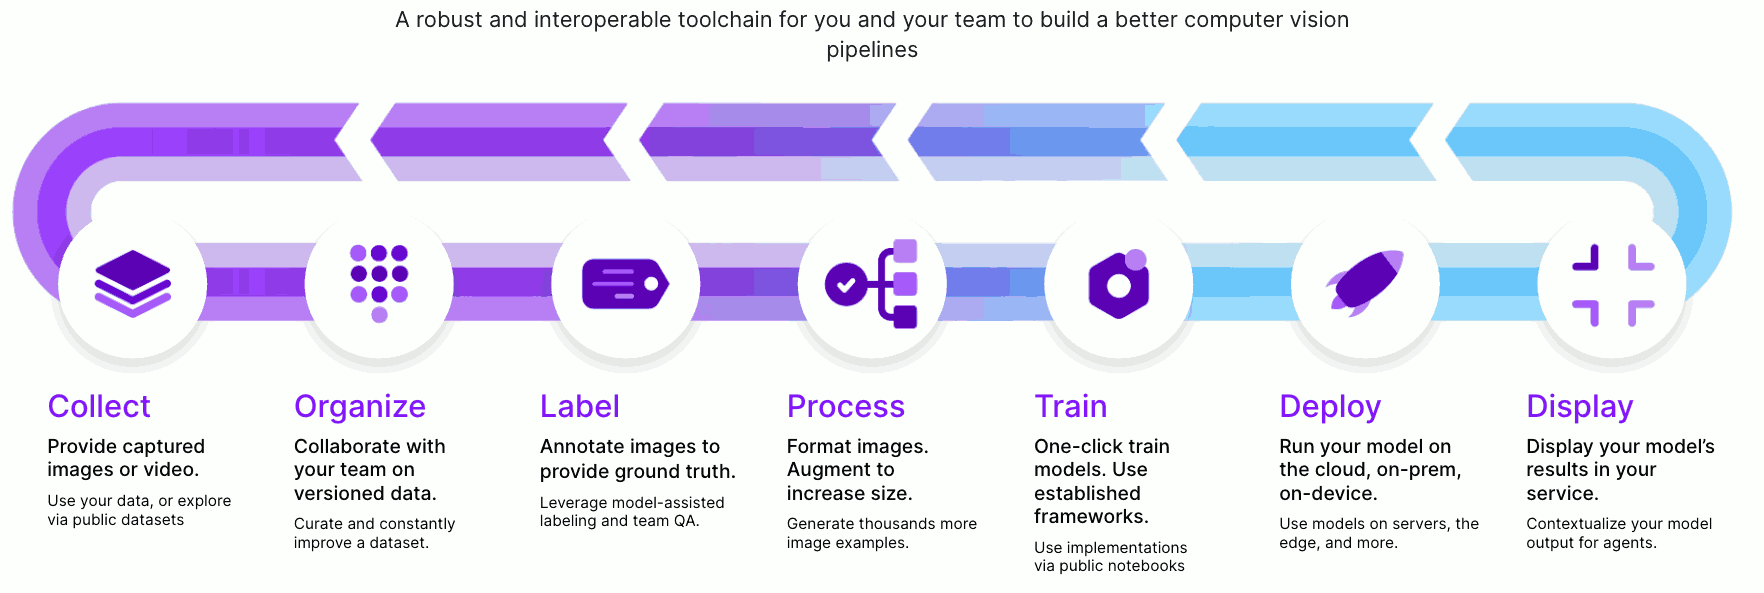

here you only want to look into the _process_ and _train_ steps and take a peek into the _collect_, _organize_ and _labelling_ step, which is normally the most time-consuming part of any ML project.

The current computer vision/ML projects ohn Roboflow include object detection, classification, instance segmentation and semantic segmentation, and you are free to choose between the different computer vision-related concepts, but object detection and classification would probably be the best choice for this journal (instance and semantic segmentation are highly complicated processes.)

Train and test a model and make documentation of the process for the journal, using images, and learning graphs. etc. from the site. 

(Notice, that there is no obvious way of getting hands-on any code behind the 'pipeline' in Roboflow, if, say you want to elaborate on the Yolov models on your own computer.)

<a name="cite_note-1"></a>[1][^](#cite_ref-1)  <span style="font-family:'Courier New'">https://2486075003-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-M6S9nPJhEX9FYH6clfW%2Fuploads%2FfHpPTWNdCVR9qHQDeskF%2FScreen%20Shot%202022-08-24%20at%2012.35.36%20PM.png?alt=media&token=623927fe-3099-4ccd-8aaa-890bf5c0b03b</span>

In [1]:
# TODO: goto Roboflow, and create a CNN project...

REVISIONS||
:-|:-
2023-04-10| CEF, initial.